# Polynomial Regression Assignment

## The objective is to apply polynomial regression on the provided data using 3 regularization techniques

Tasks are defined below:
1-  Read the dataset, and get acquainted with its features and labels. Check the link below for more details about the data.  
https://archive.ics.uci.edu/ml/datasets/Air+Quality  

2-  This dataset has 5 different output labels. For this assignment we only need the NO2 output. Please drop other outputs.  

3-  Handle missing data similar to what was covered in tutorial 3.  

4-  Replace the date feature with 3 separate features (Day, Month and Year).  

5-  Replace the time feature with 3 separate features (Hours, Minutes and Seconds).  

6-  Apply feature scaling.  

7-  Evaluate different degrees of lasso CV polynomial regression.  

8-  Choose the best degree and print the errors on the test data, model coefficients and the lasso parameters.  

9-  Repeat steps 4 and 5 using Ridge CV polynomial regression.  

10- Repeat steps 4 and 5 using ElasticNet CV polynomial regression.  

11- Compare the errors from the 3 regularization techniques, and save the best model.  

12- Load the best model and test it on a sample that you manually created it.  



### Imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

np.random.seed(420)

import warnings
warnings.filterwarnings("ignore")


### 1- Read the data

In [2]:
df=pd.read_csv("AirQualityUCI.csv",na_values=[-200])
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [4]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


### 2- Drop unwanted labels

In [5]:
#df.drop(labels=["PT08.S1(CO)","PT08.S2(NMHC)","PT08.S3(NOx)","PT08.S5(O3)"],axis=1,inplace=True)

df.drop(labels=["CO(GT)","NMHC(GT)","C6H6(GT)","NOx(GT)"],axis=1,inplace=True)
df.head()

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### 3- Handle missing data

In [6]:
df.isna().sum()

Date                0
Time                0
PT08.S1(CO)       366
PT08.S2(NMHC)     366
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [7]:
#dropping missing rows from our label 
print(df.shape)
df = df[~df["NO2(GT)"].isna()]
print(df.shape)
(df.isna().sum()/len(df)*100).round(3)

(9357, 11)
(7715, 11)


Date             0.000
Time             0.000
PT08.S1(CO)      4.174
PT08.S2(NMHC)    4.174
PT08.S3(NOx)     4.174
NO2(GT)          0.000
PT08.S4(NO2)     4.174
PT08.S5(O3)      4.174
T                4.174
RH               4.174
AH               4.174
dtype: float64

In [8]:
#dropping fully null rows 
null_rows = df.iloc[:,2:].isnull().apply(lambda x: all(x), axis=1)
print(df.shape)
df = df[~null_rows]
print(df.shape)
(df.isna().sum()/len(df)*100).round(3)

(7715, 11)
(7715, 11)


Date             0.000
Time             0.000
PT08.S1(CO)      4.174
PT08.S2(NMHC)    4.174
PT08.S3(NOx)     4.174
NO2(GT)          0.000
PT08.S4(NO2)     4.174
PT08.S5(O3)      4.174
T                4.174
RH               4.174
AH               4.174
dtype: float64

In [9]:
# dropping null values from the columns if they are less than 2%
missing_percentage= (df.isna().sum()/len(df)*100).round(3)
rows_to_drop = missing_percentage[(missing_percentage<2)& (missing_percentage>0)].index
print(rows_to_drop.values)
if(len(rows_to_drop.values)>0):
    print(df.shape)
    df = df[~df[rows_to_drop.values[0]].isna()]
    print(df.shape)
    print((df.isna().sum()/len(df)*100).round(3))

[]


In [10]:
# dropping columns which has more than 80% missing values
missing_percentage= (df.isna().sum()/len(df)*100).round(3)
col_to_drop = missing_percentage[missing_percentage>80].index
print(col_to_drop.values)
if(len(col_to_drop.values)>0):
    df.drop(labels=col_to_drop.values[0],axis=1,inplace=True)
    print((df.isna().sum()/len(df)*100).round(3))

[]


In [11]:
to_fill = df.columns[df.isnull().any()].tolist()
to_fill

['PT08.S1(CO)',
 'PT08.S2(NMHC)',
 'PT08.S3(NOx)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']

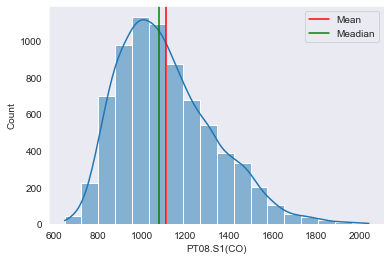

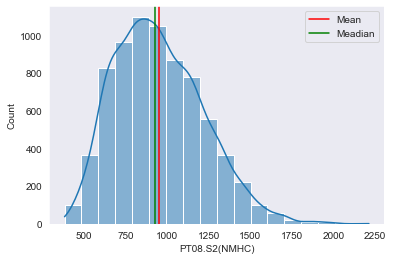

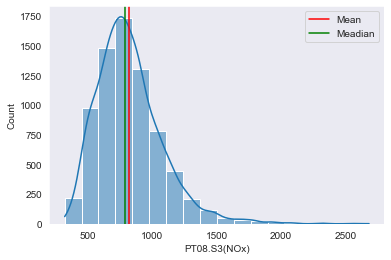

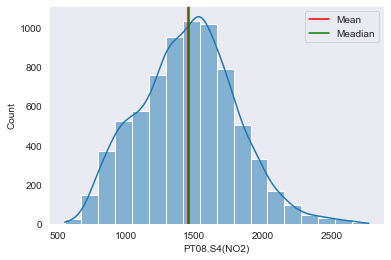

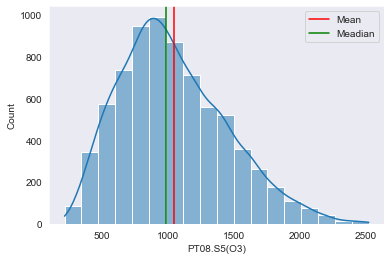

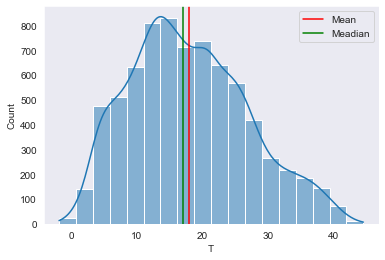

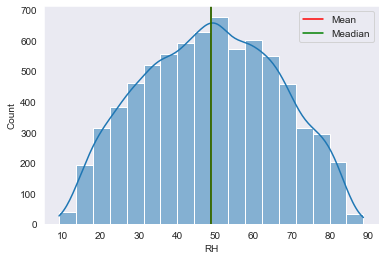

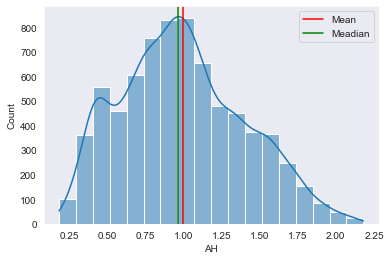

In [12]:
sns.set_style("dark")
for col in to_fill:
    ax = sns.histplot(data=df,x=col,kde=True,bins=18)
    plt.axvline(x = df[col].mean(), color = 'r', label = 'Mean')
    plt.axvline(x = df[col].median(), color = 'g', label = 'Meadian')
    plt.legend()
    plt.show()


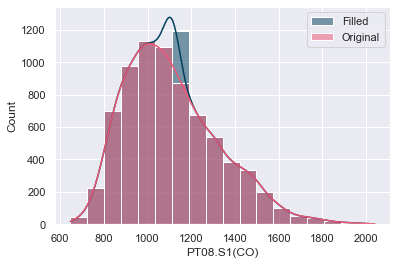

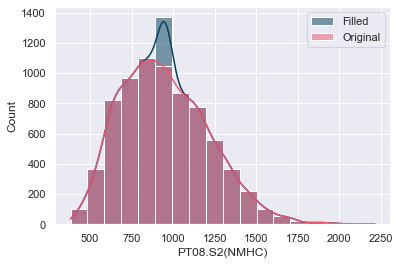

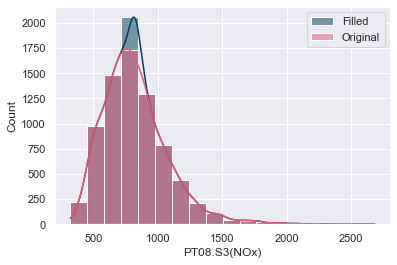

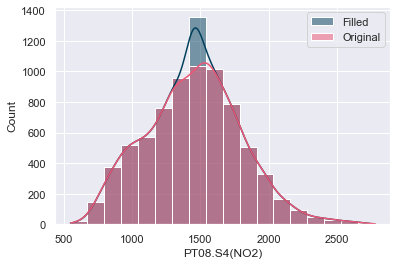

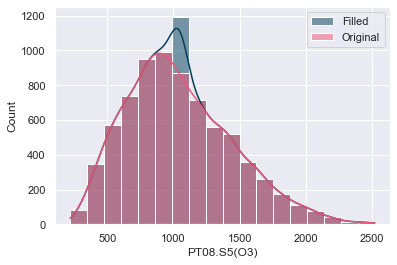

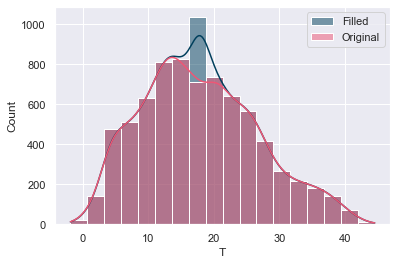

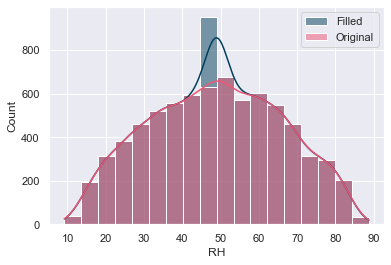

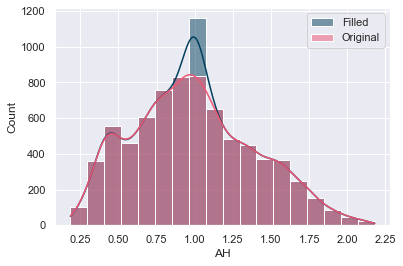

In [13]:
sns.set()
temp_list = []
for col in to_fill:
    temp_list.append(df[col].fillna((df[col].mean()).round(1)))

for i,t in enumerate(temp_list):
    sns.histplot(x=t,kde=True,bins=18,color="#003f5c",alpha = 0.5,label="Filled")
    sns.histplot(x=df[to_fill[i]],kde=True,bins=18,color="#ef5675",label="Original")
    plt.legend()
    plt.show()

In [14]:
from impyute.imputation.cs import mice
imputed = mice(df.iloc[:,2:].values)
imputed_list = []

for col in to_fill:
    imputed_list.append(imputed[:,df.columns.get_loc(col)-2])


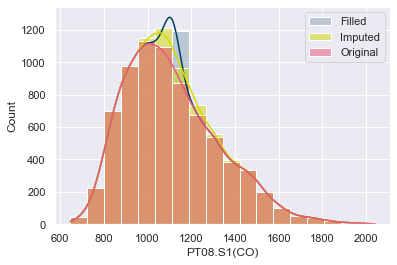

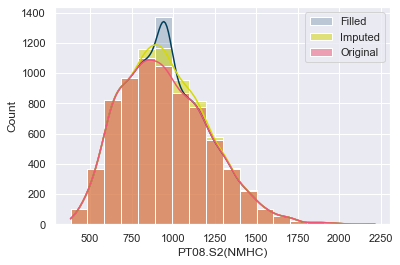

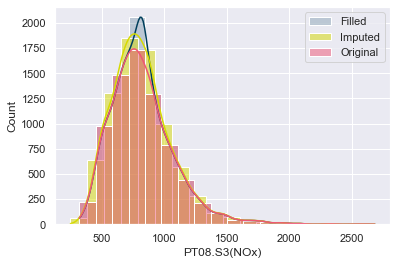

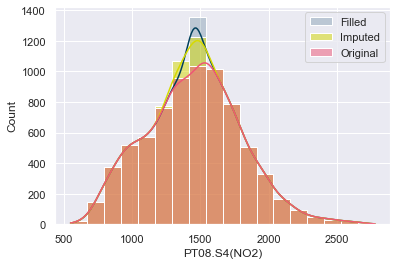

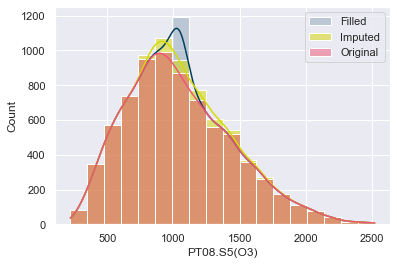

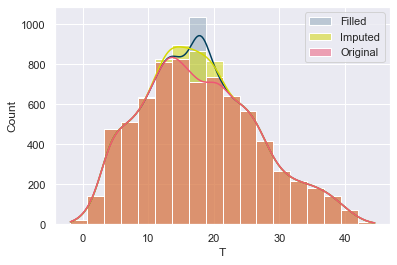

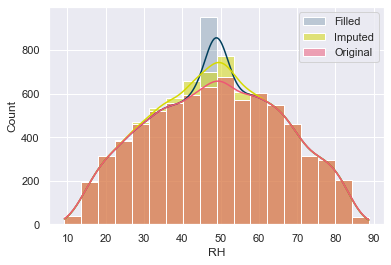

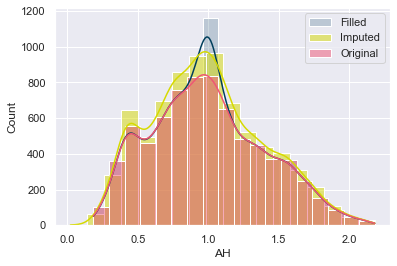

In [15]:
for i,t in enumerate(temp_list):
    sns.histplot(x=t,kde=True,bins=18,color="#003f5c",alpha = 0.2,label="Filled")
    sns.histplot(x=imputed_list[i],kde=True,bins=18,color="#d6da00",label="Imputed")
    sns.histplot(x=df[to_fill[i]],kde=True,bins=18,color="#ef5675",label="Original")
    plt.legend()
    plt.show()



In [16]:
# Filling with imputation since it gave better results
for i,col in enumerate(to_fill):
    df[col] = imputed_list[i]

### 4- Replace date feature

In [17]:
df.dtypes

Date              object
Time              object
PT08.S1(CO)      float64
PT08.S2(NMHC)    float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

In [18]:
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%Y')
df['year']=df['Date'].dt.year 
df['month']=df['Date'].dt.month 
df['day']=df['Date'].dt.day
df.drop(labels=['Date'],axis=1,inplace=True)
df.head()

,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,year,month,day
0,18:00:00,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10
1,19:00:00,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10
2,20:00:00,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10
3,21:00:00,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10
4,22:00:00,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10


### 5- Replace time feature

In [19]:
df['Time'] = pd.to_datetime(df['Time'],format='%H:%M:%S')
df['Hour'] = df['Time'].dt.hour 
df['minute'] = df['Time'].dt.minute
df['second'] = df['Time'].dt.second
df.drop(labels=['Time'],axis=1,inplace=True)
df.head()
#minutes and seconds should be dropped since observations are hourly

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,year,month,day,Hour,minute,second
0,1360.0,1046.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004,3,10,18,0,0
1,1292.0,955.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004,3,10,19,0,0
2,1402.0,939.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004,3,10,20,0,0
3,1376.0,948.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004,3,10,21,0,0
4,1272.0,836.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004,3,10,22,0,0


### 6- Apply feature scaling

In [20]:
X = df.drop('NO2(GT)',axis=1)
y = df['NO2(GT)']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)
#it is a time-series data , shuffling is debatable

In [22]:
from sklearn.preprocessing import RobustScaler
scl = RobustScaler()
X_train_new = scl.fit_transform(X_train)
X_test_new = scl.transform(X_test)

### 7- Evaluate different degrees of lasso CV polynomial regression

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
def Evaluate_Model(model,d,X_train,X_test,y_train,y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    mae_train = (mean_absolute_error(y_train,train_pred)).round(3)
    mae_test = (mean_absolute_error(y_test,test_pred)).round(3)
    rmse_train = (np.sqrt(mean_squared_error(y_train,train_pred))).round(3)
    rmse_test = (np.sqrt(mean_squared_error(y_test,test_pred))).round(3)
    #not 100% accurate but very close estimate
    rmse_train_percentage = (np.sqrt(np.mean(np.square(((y_train-train_pred) /y_train)), axis=0))).round(3)
    rmse_test_percentage = (np.sqrt(np.mean(np.square(((y_test-test_pred) /y_test)), axis=0))).round(3)
    model_params = model.get_params()
    try:
        model_params["chosen_alpha"] = model.alpha_
    except:
        pass
    try:
        model_params["chosen_l1_ratio"] = model.l1_ratio_
    except:
        pass
    
    return {'degree': d ,'coefficients':model.coef_,'parameters':model_params,'train_MAE':mae_train,'test_MAE':mae_test,'train_RMSE':rmse_train,'test_RMSE':rmse_test,'train_RMSE %':"{0:.2%}".format(rmse_train_percentage),'test_RMSE %':"{0:.2%}".format(rmse_test_percentage),'model':[model]}

lassoCV_res = pd.DataFrame(columns=['degree','coefficients','parameters','train_MAE','test_MAE','train_RMSE','test_RMSE','train_RMSE %','test_RMSE %','model'])
RidgeCV_res = pd.DataFrame(columns=['degree','coefficients','parameters','train_MAE','test_MAE','train_RMSE','test_RMSE','train_RMSE %','test_RMSE %','model'])
ElasticNetCV_res = pd.DataFrame(columns=['degree','coefficients','parameters','train_MAE','test_MAE','train_RMSE','test_RMSE','train_RMSE %','test_RMSE %','model'])

Final_res = pd.DataFrame(columns=['degree','coefficients','parameters','train_MAE','test_MAE','train_RMSE','test_RMSE','train_RMSE %','test_RMSE %','model'])




In [24]:
for i in range(1,6):
    poly_feat = PolynomialFeatures(degree=i,include_bias=False)
    
    X_train_new = poly_feat.fit_transform(X_train)
    X_test_new = poly_feat.fit_transform(X_test)
    scl = RobustScaler()
    X_train_new = scl.fit_transform(X_train_new)
    X_test_new = scl.transform(X_test_new)     
    
    model = LassoCV(eps=0.1,n_alphas=10,cv=5).fit(X_train_new, y_train)
    lassoCV_res = lassoCV_res.append(Evaluate_Model(model,i,X_train_new,X_test_new,y_train,y_test),ignore_index=True)

In [25]:
lassoCV_res

,degree,coefficients,parameters,train_MAE,test_MAE,train_RMSE,test_RMSE,train_RMSE %,test_RMSE %,model
0,1,"[0.0, 6.615307884041919, -20.075137304298035, ...","{'alphas': None, 'copy_X': True, 'cv': 5, 'eps...",18.640,18.374,24.665,24.892,60.60%,57.50%,"[LassoCV(cv=5, eps=0.1, n_alphas=10)]"
1,2,"[0.0, 0.0, -14.02593151502163, -0.0, 5.3272513...","{'alphas': None, 'copy_X': True, 'cv': 5, 'eps...",18.205,17.941,24.159,24.325,59.00%,59.40%,"[LassoCV(cv=5, eps=0.1, n_alphas=10)]"
2,3,"[0.0, 0.0, -5.822340334413806, -0.0, 0.0, -0.0...","{'alphas': None, 'copy_X': True, 'cv': 5, 'eps...",19.070,18.764,25.430,25.515,62.00%,61.40%,"[LassoCV(cv=5, eps=0.1, n_alphas=10)]"
3,4,"[0.0, 0.0, -7.873538896423755, -0.0, 0.0, -0.0...","{'alphas': None, 'copy_X': True, 'cv': 5, 'eps...",19.889,19.663,26.429,26.605,64.60%,60.80%,"[LassoCV(cv=5, eps=0.1, n_alphas=10)]"
4,5,"[0.0, 0.0, -6.194125015572386, 0.0, 0.0, -0.0,...","{'alphas': None, 'copy_X': True, 'cv': 5, 'eps...",21.556,21.431,28.599,28.796,70.40%,61.90%,"[LassoCV(cv=5, eps=0.1, n_alphas=10)]"


### 8- Choose the best degree and print the errors, model coefficients and the lasso parameters.

In [26]:
chosen = lassoCV_res[lassoCV_res["test_RMSE"]==lassoCV_res["test_RMSE"].min()]
Final_res = Final_res.append(chosen,ignore_index=True)
for (columnName, columnData) in chosen.iteritems():
    print(columnName," : " , columnData.values[0])

degree  :  2
coefficients  :  [  0.           0.         -14.02593152  -0.           5.32725139
  -0.          -0.          -0.           0.          -0.
  -0.           0.           0.           0.           0.
   0.          -0.           0.           0.           0.
  -0.          -0.           0.          -0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.          -0.
   2.44171879  -0.           0.           0.           0.
   0.          -0.          -0.           0.          -0.
  -0.          -7.85890672  -2.43576787  -0.          -0.
   0.           0.           0.          -0.           0.
  -0.          -0.          -0.          -0.          -0.
  -0.           0.           0.           0.           4.53891212
   0.           0.          -0.           5.63750365  -0.
   0.           9.28222198   0.           0.          -0.
 -18.17911937  -0.          -0.          -0.          -0.
   0.           0.        

### 9a- Evaluate different degrees of Ridge CV polynomial regression

In [27]:
for i in range(1,6):
    poly_feat= PolynomialFeatures(degree=i,include_bias=False)
    
    X_train_new = poly_feat.fit_transform(X_train)
    X_test_new = poly_feat.fit_transform(X_test) 
    scl = RobustScaler()
    X_train_new = scl.fit_transform(X_train_new)
    X_test_new = scl.transform(X_test_new)  
    
    model = RidgeCV(alphas=(0.01,0.1, 1.0),scoring='neg_mean_squared_error').fit(X_train_new, y_train)
    RidgeCV_res = RidgeCV_res.append(Evaluate_Model(model,i,X_train_new,X_test_new,y_train,y_test),ignore_index=True)

In [28]:
RidgeCV_res

,degree,coefficients,parameters,train_MAE,test_MAE,train_RMSE,test_RMSE,train_RMSE %,test_RMSE %,model
0,1,"[0.29794311305165877, 40.651122014506484, -8.3...","{'alpha_per_target': False, 'alphas': [0.01, 0...",16.492,16.502,22.074,22.484,53.90%,54.70%,"[RidgeCV(alphas=array([0.01, 0.1 , 1. ]), sco..."
1,2,"[-2.884332679068393, -1.4415203607836702, -11....","{'alpha_per_target': False, 'alphas': [0.01, 0...",13.548,14.048,18.181,18.983,51.50%,53.80%,"[RidgeCV(alphas=array([0.01, 0.1 , 1. ]), sco..."
2,3,"[54.36803674727048, 3.989908915518072, -2.6553...","{'alpha_per_target': False, 'alphas': [0.01, 0...",11.372,12.281,15.420,16.890,42.50%,48.60%,"[RidgeCV(alphas=array([0.01, 0.1 , 1. ]), sco..."
3,4,"[12.648616548016122, 18.31025738371156, -17.65...","{'alpha_per_target': False, 'alphas': [0.01, 0...",9.899,10.972,13.459,15.503,40.10%,45.20%,"[RidgeCV(alphas=array([0.01, 0.1 , 1. ]), sco..."
4,5,"[1.4200552843730065, 26.749244025485837, -7.83...","{'alpha_per_target': False, 'alphas': [0.01, 0...",7.573,10.041,10.335,14.439,22.80%,42.60%,"[RidgeCV(alphas=array([0.01, 0.1 , 1. ]), sco..."


### 9b- Choose the best degree and print the errors, model coefficients and the Ridge parameters.

In [29]:
chosen = RidgeCV_res[RidgeCV_res["test_RMSE"]==RidgeCV_res["test_RMSE"].min()]
Final_res = Final_res.append(chosen,ignore_index=True)
for (columnName, columnData) in chosen.iteritems():
    print(columnName," : " , columnData.values[0])

degree  :  5
coefficients  :  [ 1.42005528 26.74924403 -7.83948745 ...  0.          0.
  0.        ]
parameters  :  {'alpha_per_target': False, 'alphas': array([0.01, 0.1 , 1.  ]), 'cv': None, 'fit_intercept': True, 'gcv_mode': None, 'normalize': 'deprecated', 'scoring': 'neg_mean_squared_error', 'store_cv_values': False, 'chosen_alpha': 0.01}
train_MAE  :  7.573
test_MAE  :  10.041
train_RMSE  :  10.335
test_RMSE  :  14.439
train_RMSE %  :  22.80%
test_RMSE %  :  42.60%
model  :  [RidgeCV(alphas=array([0.01, 0.1 , 1.  ]), scoring='neg_mean_squared_error')]


### 10a- Evaluate different degrees of ElasticNet CV polynomial regression

In [30]:
for i in range(1,5):
    poly_feat= PolynomialFeatures(degree=i,include_bias=False)
    
    X_train_new = poly_feat.fit_transform(X_train)
    X_test_new = poly_feat.fit_transform(X_test)    
    scl = RobustScaler()
    X_train_new = scl.fit_transform(X_train_new)
    X_test_new = scl.transform(X_test_new)   
    
    model = ElasticNetCV(l1_ratio=[.2,0.5,.8],tol=0.1).fit(X_train_new, y_train)
    ElasticNetCV_res = ElasticNetCV_res.append(Evaluate_Model(model,i,X_train_new,X_test_new,y_train,y_test),ignore_index=True)

In [31]:
ElasticNetCV_res

,degree,coefficients,parameters,train_MAE,test_MAE,train_RMSE,test_RMSE,train_RMSE %,test_RMSE %,model
0,1,"[6.251371790851974, 35.81787110324345, -10.882...","{'alphas': None, 'copy_X': True, 'cv': None, '...",16.609,16.491,22.227,22.491,53.60%,54.80%,"[ElasticNetCV(l1_ratio=[0.2, 0.5, 0.8], tol=0.1)]"
1,2,"[35.20088757497235, 12.337322013671022, -5.818...","{'alphas': None, 'copy_X': True, 'cv': None, '...",15.927,15.939,21.168,21.573,51.20%,51.10%,"[ElasticNetCV(l1_ratio=[0.2, 0.5, 0.8], tol=0.1)]"
2,3,"[38.54840689177244, 8.583580932750312, -5.6610...","{'alphas': None, 'copy_X': True, 'cv': None, '...",15.104,15.140,20.043,20.546,50.70%,50.40%,"[ElasticNetCV(l1_ratio=[0.2, 0.5, 0.8], tol=0.1)]"
3,4,"[38.98673369730123, 7.78328169130294, -5.86944...","{'alphas': None, 'copy_X': True, 'cv': None, '...",14.511,14.708,19.298,19.934,51.30%,49.40%,"[ElasticNetCV(l1_ratio=[0.2, 0.5, 0.8], tol=0.1)]"


### 10b- Choose the best degree and print the errors, model coefficients and ElasticNet parameters.

In [32]:
chosen = ElasticNetCV_res[ElasticNetCV_res["test_RMSE"]==ElasticNetCV_res["test_RMSE"].min()]
Final_res = Final_res.append(chosen,ignore_index=True)
for (columnName, columnData) in chosen.iteritems():
    print(columnName," : " , columnData.values[0])

degree  :  4
coefficients  :  [38.9867337   7.78328169 -5.86944235 ...  0.          0.
  0.        ]
parameters  :  {'alphas': None, 'copy_X': True, 'cv': None, 'eps': 0.001, 'fit_intercept': True, 'l1_ratio': [0.2, 0.5, 0.8], 'max_iter': 1000, 'n_alphas': 100, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False, 'precompute': 'auto', 'random_state': None, 'selection': 'cyclic', 'tol': 0.1, 'verbose': 0, 'chosen_alpha': 0.06080211505156827, 'chosen_l1_ratio': 0.8}
train_MAE  :  14.511
test_MAE  :  14.708
train_RMSE  :  19.298
test_RMSE  :  19.934
train_RMSE %  :  51.30%
test_RMSE %  :  49.40%
model  :  [ElasticNetCV(l1_ratio=[0.2, 0.5, 0.8], tol=0.1)]


### 11- Compare the errors from the 3 regularization techniques, and save the best model.

In [33]:
Final_res

,degree,coefficients,parameters,train_MAE,test_MAE,train_RMSE,test_RMSE,train_RMSE %,test_RMSE %,model
0,2,"[0.0, 0.0, -14.02593151502163, -0.0, 5.3272513...","{'alphas': None, 'copy_X': True, 'cv': 5, 'eps...",18.205,17.941,24.159,24.325,59.00%,59.40%,"[LassoCV(cv=5, eps=0.1, n_alphas=10)]"
1,5,"[1.4200552843730065, 26.749244025485837, -7.83...","{'alpha_per_target': False, 'alphas': [0.01, 0...",7.573,10.041,10.335,14.439,22.80%,42.60%,"[RidgeCV(alphas=array([0.01, 0.1 , 1. ]), sco..."
2,4,"[38.98673369730123, 7.78328169130294, -5.86944...","{'alphas': None, 'copy_X': True, 'cv': None, '...",14.511,14.708,19.298,19.934,51.30%,49.40%,"[ElasticNetCV(l1_ratio=[0.2, 0.5, 0.8], tol=0.1)]"


In [34]:
from joblib import dump
best_Model = Final_res[Final_res["test_RMSE"]==Final_res["test_RMSE"].min()]
best_Model.reset_index(inplace=True)
print(type(best_Model.model[0][0]))
dump(best_Model.model[0][0], "best_Reg_model.joblib")
dump([best_Model.model[0][0],best_Model.degree[0]], "best_Reg_model_and_degree.joblib")

<class 'sklearn.linear_model._ridge.RidgeCV'>


['best_Reg_model_and_degree.joblib']

### 12- Load the best model and test it on a sample that you manually created it.

In [35]:
from joblib import load
loaded_model_and_degree = load('best_Reg_model_and_degree.joblib')
loaded_model = loaded_model_and_degree[0]
deg = loaded_model_and_degree[1]

test_sample = [[850, 524, 1204, 1077, 666,
        11.8, 69, 0.9169, 2008,
        12, 1, 7, 0, 0]]
poly_feat= PolynomialFeatures(degree=deg,include_bias=False)   

X_train_new = poly_feat.fit_transform(X_train)
test_sample = poly_feat.fit_transform(test_sample)   
scl = RobustScaler()
scl.fit(X_train_new)
test_sample = scl.transform(test_sample)  


loaded_model.predict(test_sample)

array([132.0715566])

## Great work!
----